In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel('/content/ML Live Flight Fare Resourses16963295320 (2).xlsx')

In [4]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
data.shape

(10683, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [8]:
del data['Route']
del data['Additional_Info']

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.dropna(inplace=True)

In [11]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648


In [12]:
data['j_date']=pd.to_datetime(data['Date_of_Journey']).dt.day
data['j_mon']=pd.to_datetime(data['Date_of_Journey']).dt.month

In [13]:
data['a_hr']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['a_min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [14]:
data['d_hr']=pd.to_datetime(data['Dep_Time']).dt.hour
data['d_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [15]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,22,25,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,23,20,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4,11,20,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,14,10,11,30


In [16]:
lis=data['Duration']
new_lis=[]
for i in lis:
    if 'm'not in i:
        i=i+'0m'
    elif'h'not in i:
        i='0h'+i
    new_lis.append(i)

In [17]:
data['Duration'] = new_lis

In [18]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,13,15,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h0m,2 stops,13882,9,6,4,25,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,23,30,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,22,25,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,23,20,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h0m,non-stop,7229,27,4,11,20,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,14,10,11,30


In [19]:
data['du_hu']=data['Duration'].str.split('h').str[0].astype(int)

In [20]:
data['du_min']=data['Duration'].str.split('h').str[1].replace('m','',regex=True).astype(int)

In [21]:
data

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,1,10,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,13,15,5,50,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h0m,2 stops,13882,9,6,4,25,9,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,23,30,18,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4,22,25,19,55,2,30
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h0m,non-stop,7229,27,4,11,20,8,20,3,0
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3,14,10,11,30,2,40


In [22]:
data.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)

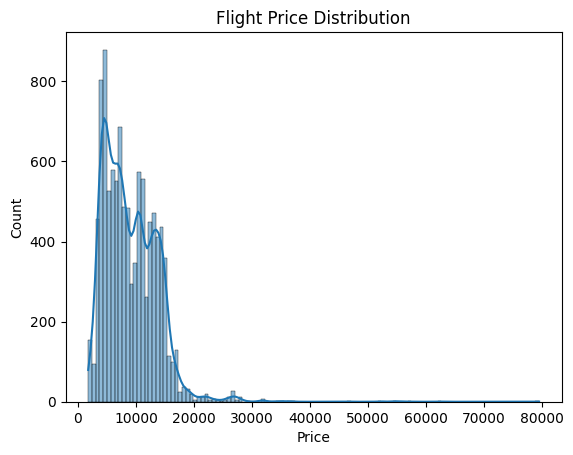

In [23]:
sns.histplot(data['Price'], kde=True)
plt.title("Flight Price Distribution")
plt.show()

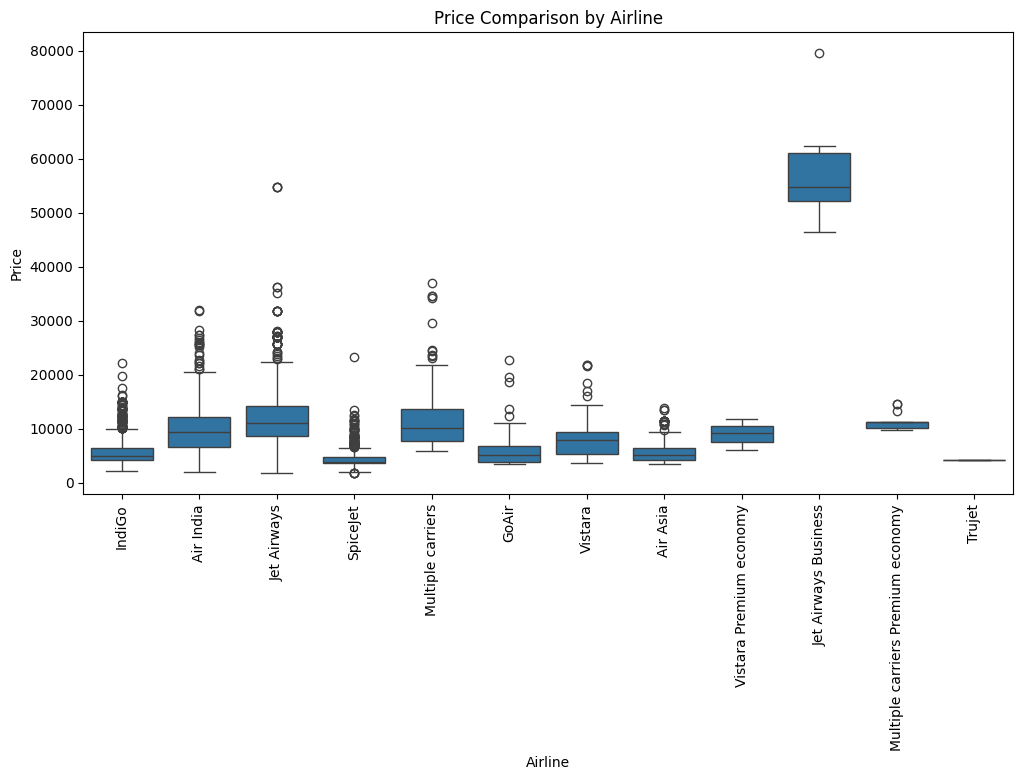

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Airline', y='Price', data=data)
plt.xticks(rotation=90)
plt.title("Price Comparison by Airline")
plt.show()

<Figure size 800x900 with 0 Axes>

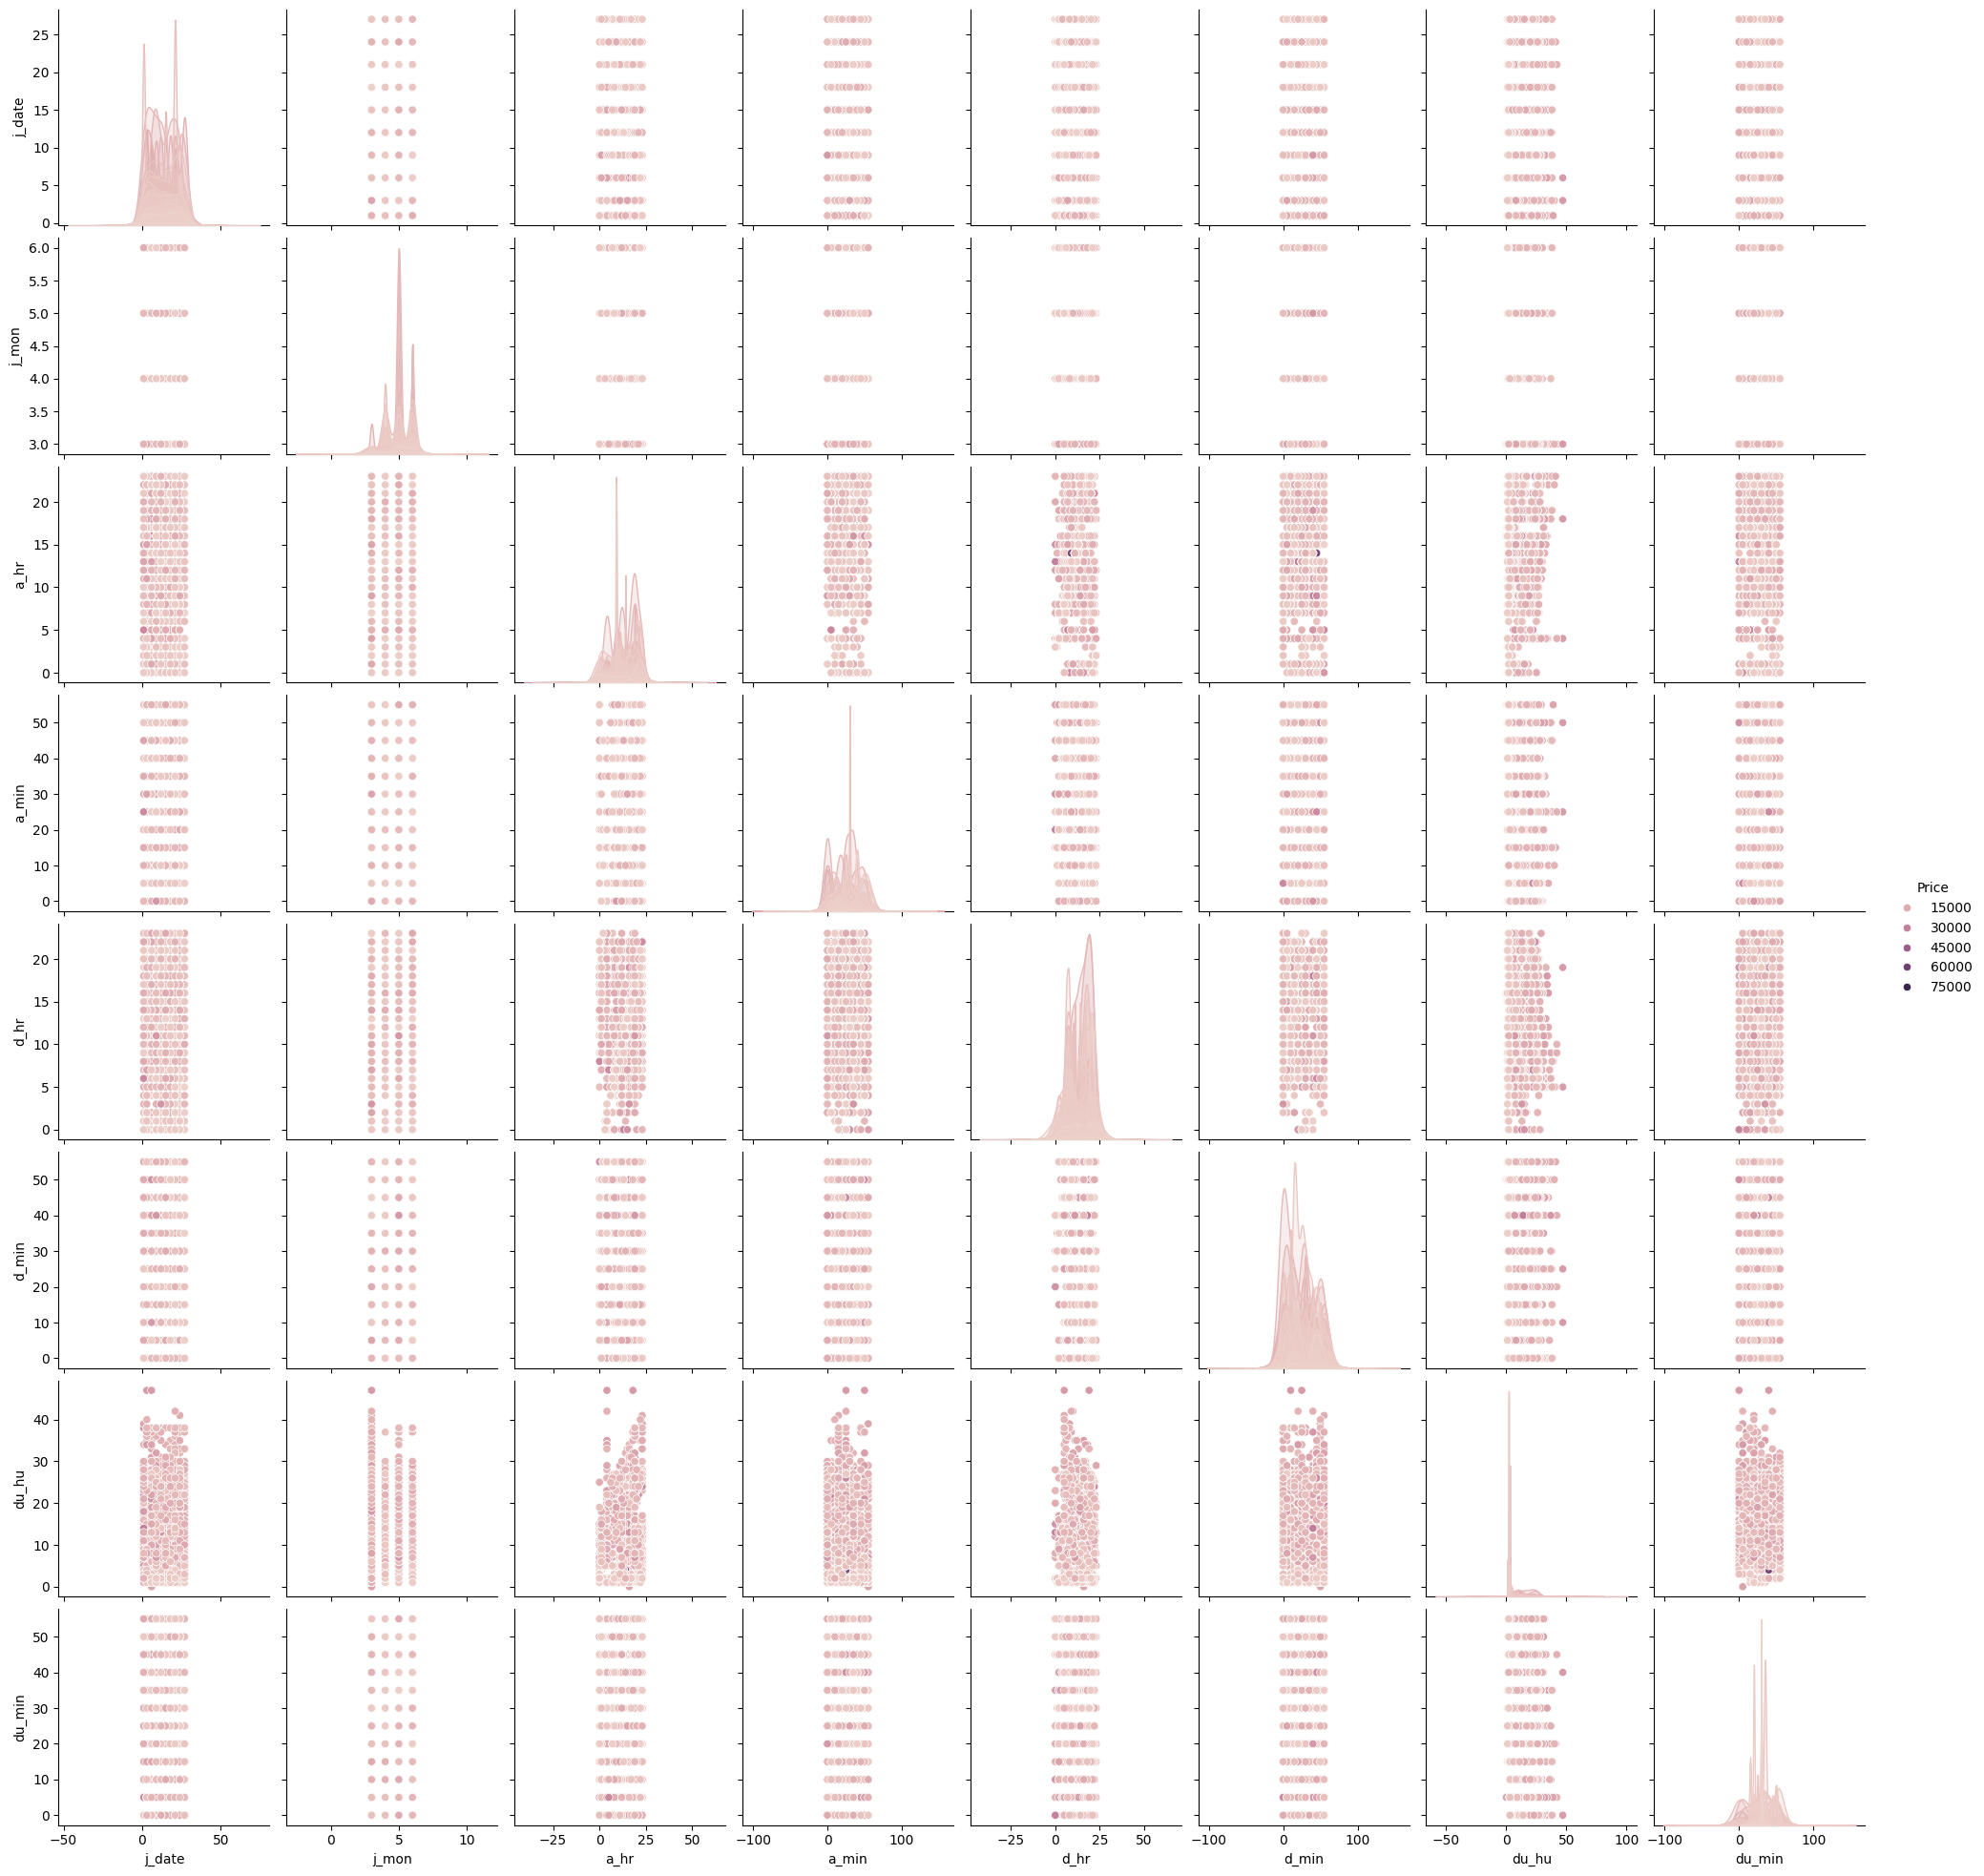

In [25]:
plt.figure(figsize=(8,9))
sns.pairplot(data,hue='Price')
plt.show()

In [26]:
data['Total_Stops'] =data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops': 2 ,'3 stops':3,'4 stops':4})

In [27]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,4,45


In [28]:
z=data[['Total_Stops','Price','j_date','j_mon','a_hr','a_min','d_hr','d_min','du_hu','du_min']]

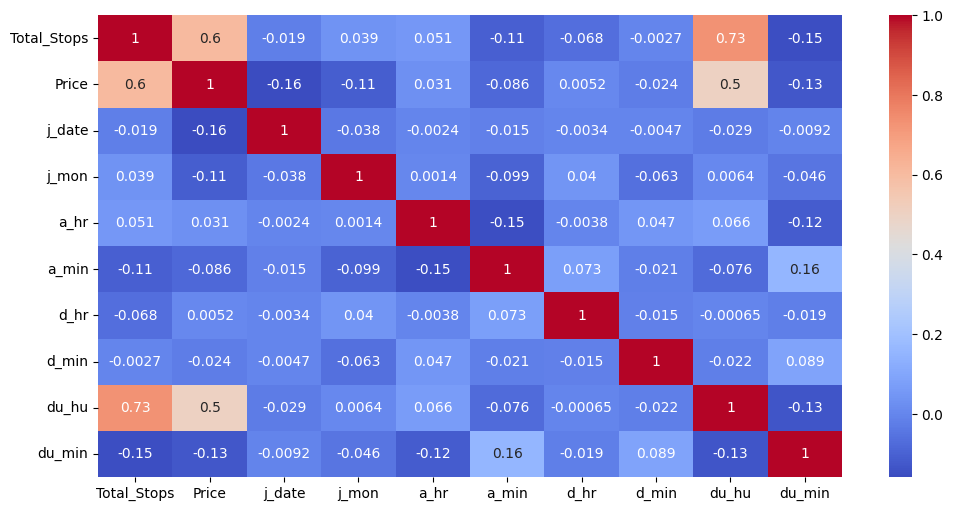

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(z.corr(),annot=True,cmap='coolwarm')
plt.show()

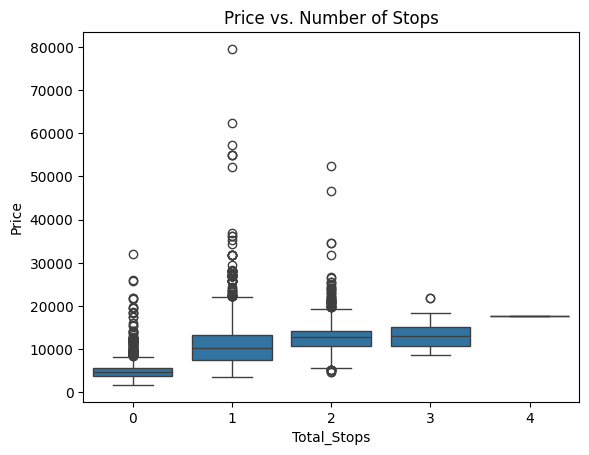

In [35]:
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title("Price vs. Number of Stops")
plt.show()

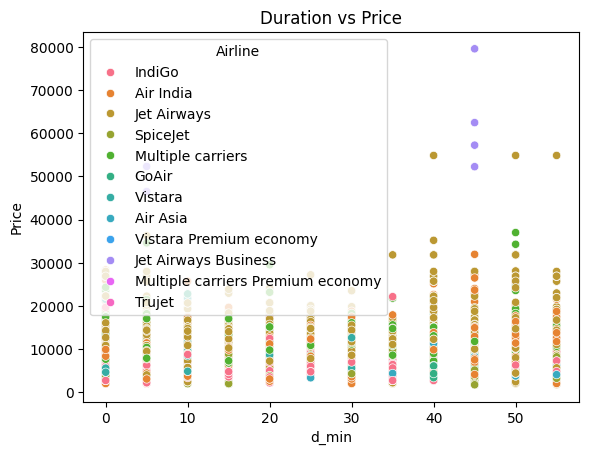

In [36]:
sns.scatterplot(x='d_min', y='Price', hue='Airline', data=data)
plt.title("Duration vs Price")
plt.show()

In [37]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,14,10,11,30,2,40


In [38]:
data['Total_Stops'].value_counts()

,count
Total_Stops,
1,5625
0,3475
2,1318
3,43
4,1


In [39]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,14,10,11,30,2,40


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
enc=LabelEncoder()

In [42]:
data['Airline']=enc.fit_transform(data['Airline'])
data['Source']=enc.fit_transform(data['Source'])
data['Destination']=enc.fit_transform(data['Destination'])

In [43]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,3,0,5,0,3897,24,3,1,10,22,20,2,50
1,1,3,0,2,7662,1,5,13,15,5,50,7,25
2,4,2,1,2,13882,9,6,4,25,9,25,19,0
3,3,3,0,1,6218,12,5,23,30,18,5,5,25
4,3,0,5,1,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,22,25,19,55,2,30
10679,1,3,0,0,4145,27,4,23,20,20,45,2,35
10680,4,0,2,0,7229,27,4,11,20,8,20,3,0
10681,10,0,5,0,12648,1,3,14,10,11,30,2,40


In [44]:
data

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,3,0,5,0,3897,24,3,1,10,22,20,2,50
1,1,3,0,2,7662,1,5,13,15,5,50,7,25
2,4,2,1,2,13882,9,6,4,25,9,25,19,0
3,3,3,0,1,6218,12,5,23,30,18,5,5,25
4,3,0,5,1,13302,1,3,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4107,9,4,22,25,19,55,2,30
10679,1,3,0,0,4145,27,4,23,20,20,45,2,35
10680,4,0,2,0,7229,27,4,11,20,8,20,3,0
10681,10,0,5,0,12648,1,3,14,10,11,30,2,40


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
min=MinMaxScaler()

In [48]:
df = pd.DataFrame(min.fit_transform(data),columns=data.columns )
df

,Airline,Source,Destination,Total_Stops,Price,j_date,j_mon,a_hr,a_min,d_hr,d_min,du_hu,du_min
0,0.272727,0.00,1.0,0.00,0.027497,0.884615,0.000000,0.043478,0.181818,0.956522,0.363636,0.042553,0.909091
1,0.090909,0.75,0.0,0.50,0.075920,0.000000,0.666667,0.565217,0.272727,0.217391,0.909091,0.148936,0.454545
2,0.363636,0.50,0.2,0.50,0.155917,0.307692,1.000000,0.173913,0.454545,0.391304,0.454545,0.404255,0.000000
3,0.272727,0.75,0.0,0.25,0.057348,0.423077,0.666667,1.000000,0.545455,0.782609,0.090909,0.106383,0.454545
4,0.272727,0.00,1.0,0.25,0.148457,0.000000,0.000000,0.913043,0.636364,0.695652,0.909091,0.085106,0.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,0.000000,0.75,0.0,0.00,0.030198,0.307692,0.333333,0.956522,0.454545,0.826087,1.000000,0.042553,0.545455
10458,0.090909,0.75,0.0,0.00,0.030687,1.000000,0.333333,1.000000,0.363636,0.869565,0.818182,0.042553,0.636364
10459,0.363636,0.00,0.4,0.00,0.070351,1.000000,0.333333,0.478261,0.363636,0.347826,0.363636,0.063830,0.000000
10460,0.909091,0.00,1.0,0.00,0.140046,0.000000,0.000000,0.608696,0.181818,0.478261,0.545455,0.042553,0.727273


In [49]:
num=df.select_dtypes(include=np.number).columns
num

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price', 'j_date',
       'j_mon', 'a_hr', 'a_min', 'd_hr', 'd_min', 'du_hu', 'du_min'],
      dtype='object')

In [50]:


for column in num:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

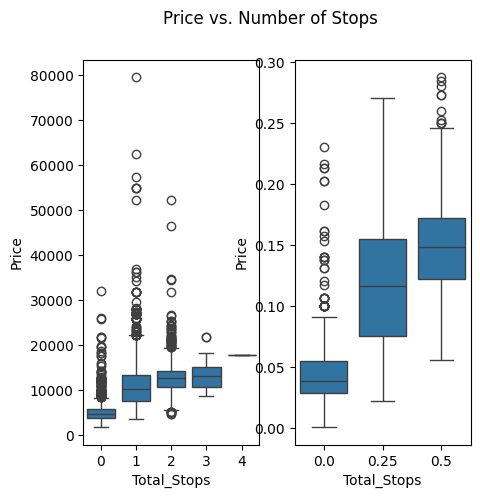

In [51]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.suptitle("Price vs. Number of Stops")
plt.subplot(1,2,2)
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.show()

In [52]:
x=df.drop('Price',axis=1)
y=df['Price']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [55]:
y_pred=model.predict(x_test)

In [56]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.6266840113762637
0.5844818094394002


In [57]:
from sklearn.metrics import mean_squared_error,r2_score
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.5844818094394002
0.0012230539479681965


In [58]:
from sklearn.tree import DecisionTreeRegressor
te=DecisionTreeRegressor(max_depth=8,random_state=42000)
te.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42000)

In [59]:
print(te.score(x_train,y_train))
print(te.score(x_test,y_test))

0.8548971112556972
0.799918602044735


In [60]:
y_pred=te.predict(x_test)

In [61]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.799918602044735
0.0005889281125190445


In [62]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=60,max_depth=8,random_state=42)
rf.fit(x_train, y_train)
y_pred_rf=rf.predict(x_test)
print(te.score(x_train,y_train))
print(te.score(x_test,y_test))



0.8548971112556972
0.799918602044735


In [63]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.799918602044735
0.0005889281125190445


In [64]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
xg.score(x_train,y_train)

0.9249212838828529

In [66]:
xg.score(x_test,y_test)

0.7801590053980216

In [67]:
y_pred_xg=xg.predict(x_test)
print(r2_score(y_test,y_pred_xg))
print(mean_squared_error(y_test,y_pred))

0.7801590053980216
0.0005889281125190445


In [68]:
from sklearn.ensemble import AdaBoostRegressor

In [69]:

model=AdaBoostRegressor()

In [70]:
model.fit(x_train,y_train)

AdaBoostRegressor()

In [71]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.701830984562644
0.6801896419698306


In [72]:
y_pred=model.predict(x_test)

In [73]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6801896419698306
0.0009413434354395032
